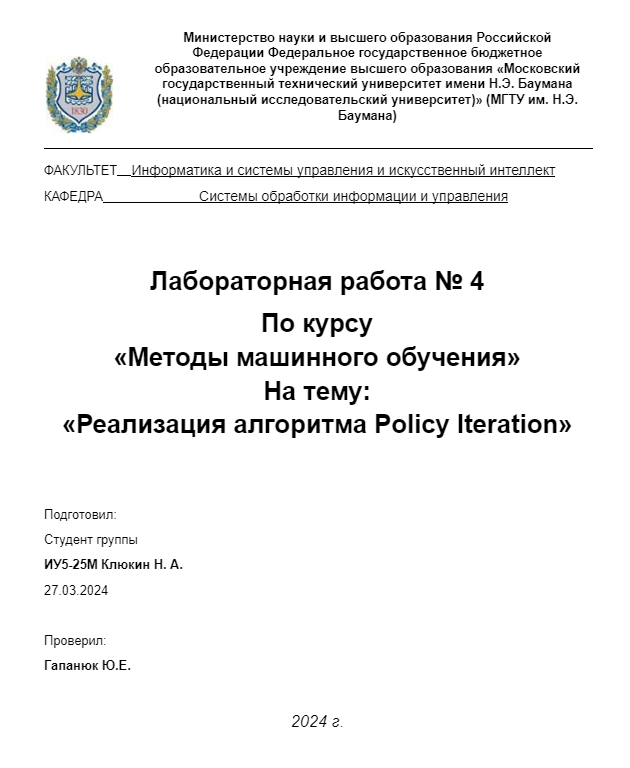

- **Цель лабораторной работы**: ознакомление с базовыми методами обучения с подкреплением

# Задание

- На основе рассмотренного на лекции примера реализуйте алгоритм Policy Iteration для любой среды обучения с подкреплением (кроме рассмотренной на лекции среды Toy Text / Frozen Lake) из библиотеки Gym (или аналогичной библиотеки).

# Подключение библиотек

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

# Ход работы

In [2]:
class PolicyIterationAgent:
    '''
    Класс, эмулирующий работу агента
    '''
    def __init__(self, env):
        self.env = env
        # Пространство состояний
        self.observation_dim = 48
        # Массив действий в соответствии с документацией
        self.actions_variants = np.array([3,2,1,0])
        # Задание стратегии (политики)
        # Карта 12х4 и 4 возможных действия 
        self.policy_probs = np.full((self.observation_dim, len(self.actions_variants)), 0.25)
        # Начальные значения для v(s)
        self.state_values = np.zeros(shape=(self.observation_dim))
        # Начальные значения параметров
        self.maxNumberOfIterations = 1000
        self.theta=1e-6
        self.gamma=0.99


    def print_policy(self):
        '''
        Вывод матриц стратегии
        '''
        print('Стратегия:')
        pprint(self.policy_probs)


    def policy_evaluation(self):
        '''
        Оценивание стратегии 
        '''
        # Предыдущее значение функции ценности
        valueFunctionVector = self.state_values
        for iterations in range(self.maxNumberOfIterations):
            # Новое значение функции ценности
            valueFunctionVectorNextIteration=np.zeros(shape=(self.observation_dim))
            # Цикл по состояниям
            for state in range(self.observation_dim):
                # Вероятности действий
                action_probabilities = self.policy_probs[state]
                # Цикл по действиям
                outerSum=0
                for action, prob in enumerate(action_probabilities):
                    innerSum=0
                    # Цикл по вероятностям действий
                    for probability, next_state, reward, isTerminalState in self.env.P[state][action]:
                        innerSum=innerSum+probability*(reward+self.gamma*self.state_values[next_state])
                    outerSum=outerSum+self.policy_probs[state][action]*innerSum
                valueFunctionVectorNextIteration[state]=outerSum
            if(np.max(np.abs(valueFunctionVectorNextIteration-valueFunctionVector))<self.theta):
                # Проверка сходимости алгоритма
                valueFunctionVector=valueFunctionVectorNextIteration
                break
            valueFunctionVector=valueFunctionVectorNextIteration
        return valueFunctionVector               


    def policy_improvement(self):
        '''
        Улучшение стратегии 
        '''
        qvaluesMatrix=np.zeros((self.observation_dim, len(self.actions_variants)))
        improvedPolicy=np.zeros((self.observation_dim, len(self.actions_variants)))
        # Цикл по состояниям
        for state in range(self.observation_dim):
            for action in range(len(self.actions_variants)):
                for probability, next_state, reward, isTerminalState in self.env.P[state][action]:
                    qvaluesMatrix[state,action]=qvaluesMatrix[state,action]+probability*(reward+self.gamma*self.state_values[next_state])
                
            # Находим лучшие индексы
            bestActionIndex=np.where(qvaluesMatrix[state,:]==np.max(qvaluesMatrix[state,:]))
            # Обновление стратегии
            improvedPolicy[state,bestActionIndex]=1/np.size(bestActionIndex)
        return improvedPolicy    


    def policy_iteration(self, cnt):
        '''
        Основная реализация алгоритма
        '''
        policy_stable = False
        for i in range(1, cnt+1):
            self.state_values = self.policy_evaluation()
            self.policy_probs = self.policy_improvement()
        print(f'Алгоритм выполнился за {i} шагов.')


def play_agent(agent):
    env2 = gym.make('CliffWalking-v0', render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        p = agent.policy_probs[state]
        if isinstance(p, np.ndarray):
            action = np.random.choice(len(agent.actions_variants), p=p)
        else:
            action = p
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True


def main():
    # Создание среды
    env = gym.make('CliffWalking-v0')
    env.reset()
    # Обучение агента
    agent = PolicyIterationAgent(env)
    agent.print_policy()
    agent.policy_iteration(1000)
    agent.print_policy()
    # Проигрывание сцены для обученного агента
    play_agent(agent)


if __name__ == '__main__':
    main()

Стратегия:
array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],

c:\Users\NKliukin\Code\bmstu\mmo_2_2024\venv\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
